Let’s say you want to create a promotional campaign for an e-commerce store and offer discounts to customers in the hopes that this might increase your sales.

You have been provided descriptions of products on Amazon and Flipkart, including details like product title, ratings, reviews, and actual prices. In this challenge, you will predict discounted prices of the listed products based on their ratings and actual prices.

1. title - Name of the product
2. Rating- average rating given to a product
3. maincateg - category that the product is listed under(men/women)
4. platform - platform on which it is sold on (Eg. Amazon, Flipkart)
5. price1 - Discounted Price of the listed product
6. actprice1 - Actual price of the listed product
Offer % - Discount percent
7. norating1 - number of ratings available for a particular product
8. noreviews1 - number of reviews available for a particular product
9. star_5f - number of five star ratings given to a particular product
10. star_4f - number of four star ratings given to a particular product
11. star_3f - number of three star ratings given to a particular product
12. star_2f - number of two star ratings given to a particular product
13. star_1f - number of one star ratings given to a particular product
14. fulfilled1- whether it is Amazon fulfilled or not

The evaluation metric is based on RMSE Score, which is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed.

In [1]:
import numpy as np
from array import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("train.csv")
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [4]:
df.shape

(15730, 16)

In [5]:
df_t = pd.read_csv("test.csv")

In [6]:
df_t.shape

(5244, 14)

In [7]:
df.columns

Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'price1', 'actprice1',
       'Offer %', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f',
       'star_2f', 'star_1f', 'fulfilled1'],
      dtype='object')

In [8]:
df_t.columns

Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'actprice1',
       'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f',
       'star_1f', 'fulfilled1'],
      dtype='object')

In [9]:
df.isna().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [10]:
df.dtypes

id              int64
title          object
Rating        float64
maincateg      object
platform       object
price1          int64
actprice1       int64
Offer %        object
norating1     float64
noreviews1    float64
star_5f       float64
star_4f       float64
star_3f       float64
star_2f         int64
star_1f         int64
fulfilled1      int64
dtype: object

In [11]:
df['fulfilled1'].value_counts()

1    9462
0    6268
Name: fulfilled1, dtype: int64

In [12]:
df.platform.value_counts()

Flipkart    15389
Amazon        341
Name: platform, dtype: int64

In [13]:
df.platform = df.platform.map({'Flipkart' : 1 , 'Amazon' : 2})

In [14]:
df.title = df.title.astype('str')

In [15]:
df['gender'] = np.where(df['title'].str.contains('Women'), 'Women', 'Men')

In [16]:
df.maincateg.fillna(df['gender'], inplace= True)

In [17]:
df_new = df.copy()

In [18]:
df_new.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,gender
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,1,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0,Women
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,1,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1,Men
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,1,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1,Women
3,495,Men Black Sports Sandal,4.2,Men,1,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,Men
4,16408,Men Green Sports Sandal,3.9,Men,1,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1,Men


In [19]:
df_new.isna().sum()

id              0
title           0
Rating          0
maincateg       0
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
gender          0
dtype: int64

In [20]:
df_new.maincateg = df_new.maincateg.map({'Men' : 0 , 'Women' : 1})

In [21]:
df_new.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,gender
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,1,1,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0,Women
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,1,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1,Men
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,1,1,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1,Women
3,495,Men Black Sports Sandal,4.2,0,1,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,Men
4,16408,Men Green Sports Sandal,3.9,0,1,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1,Men


In [22]:
df_new.fillna(df_new.median(), inplace= True)

In [23]:
df_new.isna().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
gender        0
dtype: int64

In [24]:
df_new.dtypes

id              int64
title          object
Rating        float64
maincateg       int64
platform        int64
price1          int64
actprice1       int64
Offer %        object
norating1     float64
noreviews1    float64
star_5f       float64
star_4f       float64
star_3f       float64
star_2f         int64
star_1f         int64
fulfilled1      int64
gender         object
dtype: object

In [25]:
features = ['norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f']

(array([[1.5412e+04, 2.3100e+02, 4.2000e+01, 1.5000e+01, 1.9000e+01,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+01],
        [1.5718e+04, 1.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.5625e+04, 7.7000e+01, 1.7000e+01, 0.0000e+00, 0.0000e+00,
         1.1000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.5709e+04, 8.0000e+00, 1.3000e+01, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.5719e+04, 1.1000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]),
 array([     0. ,  28997.3,  57994.6,  86991.9, 115989.2, 144986.5,
        173983.8, 202981.1, 231978.4, 260975.7, 289973. ]),
 <a list of 5 BarContainer objects>)

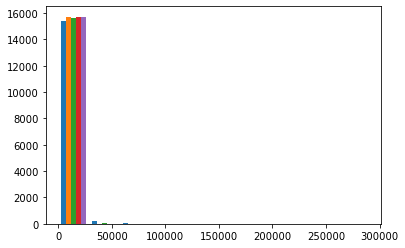

In [26]:
plt.hist(df_new[features])

In [27]:
df_new[features] = df_new[features].astype(int)

In [28]:
df_new.dtypes

id              int64
title          object
Rating        float64
maincateg       int64
platform        int64
price1          int64
actprice1       int64
Offer %        object
norating1       int32
noreviews1      int32
star_5f         int32
star_4f         int32
star_3f         int32
star_2f         int64
star_1f         int64
fulfilled1      int64
gender         object
dtype: object

In [29]:
df_n = df_new.copy()

In [30]:
df_n = df_n.drop(['title', 'Offer %', 'gender'], axis = 1)

In [31]:
df_n.head()

,id,Rating,maincateg,platform,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,3.9,1,1,698,999,38,7,17,9,6,3,3,0
1,5120,3.8,0,1,999,1999,531,69,264,92,73,29,73,1
2,18391,4.4,1,1,2749,4999,17,4,11,3,2,1,0,1
3,495,4.2,0,1,518,724,46413,6229,1045,12416,5352,701,4595,1
4,16408,3.9,0,1,1379,2299,77,3,35,21,7,7,7,1


In [32]:
df_n.shape

(15730, 14)

In [33]:
df_t.isna().sum()

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [34]:
df_t['gender'] = np.where(df_t['title'].str.contains('Women'), 'Women', 'Men')
df_t.maincateg.fillna(df_t['gender'], inplace= True)

In [35]:
df_t.platform = df_t.platform.map({'Flipkart' : 1 , 'Amazon' : 2})

In [36]:
df_tnew = df_t.copy()

In [37]:
df_tnew.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,gender
0,2242,Casuals For Men (Blue),3.8,Men,1,999,27928,3543,14238.0,4295,3457,1962,3976.0,1,Men
1,20532,Women Black Flats Sandal,3.9,Women,1,499,3015,404,1458.0,657,397,182,321.0,1,Women
2,10648,Women Gold Wedges Sandal,3.9,Women,1,999,449,52,229.0,70,71,33,46.0,1,Women
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,1,2999,290,40,141.0,51,49,17,32.0,1,Men
4,12593,Loafers For Men (Tan),3.9,Men,1,999,2423,326,1265.0,414,293,143,308.0,0,Men


In [38]:
df_tnew.isna().sum()

id              0
title           0
Rating        203
maincateg       0
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
gender          0
dtype: int64

In [39]:
df_tnew.maincateg = df_tnew.maincateg.map({'Men' : 0 , 'Women' : 1})

In [40]:
df_tnew.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,gender
0,2242,Casuals For Men (Blue),3.8,0,1,999,27928,3543,14238.0,4295,3457,1962,3976.0,1,Men
1,20532,Women Black Flats Sandal,3.9,1,1,499,3015,404,1458.0,657,397,182,321.0,1,Women
2,10648,Women Gold Wedges Sandal,3.9,1,1,999,449,52,229.0,70,71,33,46.0,1,Women
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,0,1,2999,290,40,141.0,51,49,17,32.0,1,Men
4,12593,Loafers For Men (Tan),3.9,0,1,999,2423,326,1265.0,414,293,143,308.0,0,Men


In [41]:
df_tnew.fillna(df_tnew.median(), inplace= True)

In [42]:
df_tnew.isna().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
gender        0
dtype: int64

In [43]:
df_tnew.dtypes

id              int64
title          object
Rating        float64
maincateg       int64
platform        int64
actprice1       int64
norating1       int64
noreviews1      int64
star_5f       float64
star_4f         int64
star_3f         int64
star_2f         int64
star_1f       float64
fulfilled1      int64
gender         object
dtype: object

In [44]:
features_t = ['star_5f', 'star_1f']

In [45]:
df_tnew[features_t] = df_tnew[features_t].astype(int)

In [46]:
df_tnew.dtypes

id              int64
title          object
Rating        float64
maincateg       int64
platform        int64
actprice1       int64
norating1       int64
noreviews1      int64
star_5f         int32
star_4f         int64
star_3f         int64
star_2f         int64
star_1f         int32
fulfilled1      int64
gender         object
dtype: object

In [47]:
df_tn = df_tnew.copy()

In [48]:
df_tn = df_tn.drop(['title', 'gender'], axis = 1)

In [49]:
df_tn.head()

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,3.8,0,1,999,27928,3543,14238,4295,3457,1962,3976,1
1,20532,3.9,1,1,499,3015,404,1458,657,397,182,321,1
2,10648,3.9,1,1,999,449,52,229,70,71,33,46,1
3,20677,3.9,0,1,2999,290,40,141,51,49,17,32,1
4,12593,3.9,0,1,999,2423,326,1265,414,293,143,308,0


In [50]:
df_tn.shape

(5244, 13)

Model/Algorithms

In [51]:
X = df_n.drop(['price1'], axis = 1)
y = df_n.price1

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size= 0.1, random_state= 42)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [54]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14157, 13)
(14157,)
(1573, 13)
(1573,)


In [55]:
from sklearn.linear_model import LinearRegression
lir = LinearRegression()
lir.fit(X_train, y_train)
y_lir = lir.predict(X_test)
rms_lir = np.sqrt(mean_squared_error(y_test, y_lir))
print("RMSE estimate: {}, std: {}".format(rms_lir.mean(), rms_lir.std()))

RMSE estimate: 282.0457835209978, std: 0.0


In [56]:
from sklearn.linear_model import Ridge
# determine RMSE for ridge regression model with alpha = 0.1
rl = Ridge(alpha = 50, random_state=42)
rl.fit(X_train, y_train)
y_rl = rl.predict(X_test)
rms_rl = np.sqrt(mean_squared_error(y_test, y_rl))
print("RMSE estimate: {}, std: {}".format(rms_rl.mean(), rms_rl.std()))

RMSE estimate: 282.3904625309921, std: 0.0


In [57]:
from sklearn.linear_model import Lasso
## determine RMSE for lasso regression model with alpha = 0.1
lm = Lasso(alpha = 0.1, random_state= 42)
lm.fit(X_train, y_train)
y_lm = lm.predict(X_test)
rms_lm = np.sqrt(mean_squared_error(y_test, y_lm))
print("RMSE estimate: {}, std: {}".format(rms_lm.mean(), rms_lm.std()))

RMSE estimate: 282.08336071940016, std: 0.0


In [58]:
from sklearn.ensemble import RandomForestRegressor
fl = RandomForestRegressor()
fl.fit(X_train, y_train)
y_fl = fl.predict(X_test)
rms_fl = np.sqrt(mean_squared_error(y_test, y_fl))
print("RMSE estimate: {}, std: {}".format(rms_fl.mean(), rms_fl.std()))

RMSE estimate: 189.92722781999203, std: 0.0


In [59]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_dt = dt.predict(X_test)
rms_dt = np.sqrt(mean_squared_error(y_test, y_dt))
print("RMSE estimate: {}, std: {}".format(rms_dt.mean(), rms_dt.std()))

RMSE estimate: 244.2989073548515, std: 0.0


In [60]:
from sklearn.svm import SVR
sv = SVR()
sv.fit(X_train, y_train)
y_sv = sv.predict(X_test)
rms_sv = np.sqrt(mean_squared_error(y_test, y_sv))
print("RMSE estimate: {}, std: {}".format(rms_sv.mean(), rms_sv.std()))

RMSE estimate: 665.368091692484, std: 0.0


In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_gbr = gbr.predict(X_test)
rms_gbr = np.sqrt(mean_squared_error(y_test, y_gbr))
print("RMSE estimate: {}, std: {}".format(rms_gbr.mean(), rms_gbr.std()))

RMSE estimate: 242.44774054705778, std: 0.0


In [62]:
from sklearn.ensemble import HistGradientBoostingRegressor
hgbr =HistGradientBoostingRegressor()
hgbr.fit(X_train, y_train)
y_hgbr = hgbr.predict(X_test)
rms_hgbr = np.sqrt(mean_squared_error(y_test, y_hgbr))
print("RMSE estimate: {}, std: {}".format(rms_hgbr.mean(), rms_hgbr.std()))

RMSE estimate: 214.15617418019994, std: 0.0


In [71]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(n_estimators = 500, learning_rate=0.1)
xgbr.fit(X_train, y_train)
y_xgbr = xgbr.predict(X_test)
rms_xgbr = np.sqrt(mean_squared_error(y_test, y_xgbr))
print("RMSE estimate: {}, std: {}".format(rms_xgbr.mean(), rms_xgbr.std()))

RMSE estimate: 189.48470844220083, std: 0.0


In [64]:
from catboost import CatBoostRegressor
catbr = CatBoostRegressor(verbose= 0, n_estimators= 100)
catbr.fit(X_train, y_train)
y_catbr = catbr.predict(X_test)
rms_catbr = np.sqrt(mean_squared_error(y_test, y_catbr))
print("RMSE estimate: {}, std: {}".format(rms_catbr.mean(), rms_catbr.std()))

RMSE estimate: 218.44778286869848, std: 0.0


In [65]:
models = pd.DataFrame({
    'Model': ['LinearRegression', 'Ridge', 'Lasso', 'DecisionTree', 'RandomForest', 'SVR', 'Gradient Regressor', 'Histogram Gradient', 'XG Boosting', 'Cat Boosting'],
    'RMSE': [rms_lir.mean(), rms_rl.mean(), rms_lm.mean(), rms_dt.mean(), rms_fl.mean(), rms_sv.mean(), rms_gbr.mean(), rms_hgbr.mean(), rms_xgbr.mean(), rms_catbr.mean()]})
models.sort_values(by = 'RMSE', ascending= True)

,Model,RMSE
8,XG Boosting,188.893529
4,RandomForest,189.927228
7,Histogram Gradient,214.156174
9,Cat Boosting,218.447783
6,Gradient Regressor,242.447741
3,DecisionTree,244.298907
0,LinearRegression,282.045784
2,Lasso,282.083361
1,Ridge,282.390463
5,SVR,665.368092


In [72]:
target = xgbr.predict(df_tn)
d = pd.DataFrame(target)
d.index = df_tn.id
d.columns = ['price1']
d.to_csv('predictions.csv', index= True)

In [73]:
d.head()

,price1
id,
2242,396.660431
20532,286.928894
10648,411.888153
20677,910.263306
12593,376.390137
